In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import tensorflow as tf
from keras.datasets import mnist

2024-05-28 10:10:29.587554: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-28 10:10:29.587813: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-28 10:10:31.854724: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-28 10:10:41.161907: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 10:11:26.490814: W tensorflow/compiler/tf2

In [9]:
# np.array(Image.open("prafull.jpg"))

2024-05-26 12:12:39.511586392 [E:onnxruntime:Default, provider_bridge_ort.cc:1744 TryGetProviderInfo_CUDA] /onnxruntime_src/onnxruntime/core/session/provider_bridge_ort.cc:1426 onnxruntime::Provider& onnxruntime::ProviderLibrary::Get() [ONNXRuntimeError] : 1 : FAIL : Failed to load library libonnxruntime_providers_cuda.so with error: libcublasLt.so.11: cannot open shared object file: No such file or directory

2024-05-26 12:12:39.511660880 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:870 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/execution-providers/CUDA-ExecutionProvider.html#requirementsto ensure all dependencies are met.


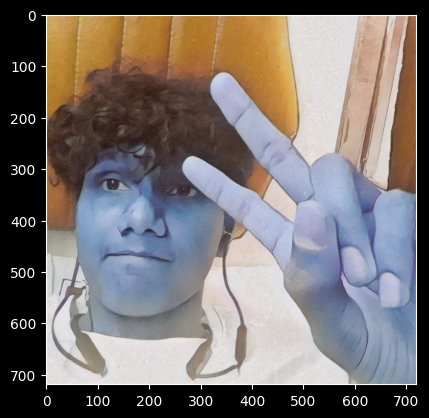

In [20]:
img = np.array(Image.open("prafull.jpg"), dtype=np.float32)
obj = CartoonGen(1)
mat, scale = obj.load_test_data(img)

res = obj.Convert(mat, scale)

plt.imshow(res)

In [6]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
# model = pickle.load(open("model_saved.pkl", "rb"))


In [15]:
# def save_imgs(generator, epoch, examples=10, dim=(60,160,128), figsize=(20, 2)):
#     noise = np.random.normal(0, 1, (examples, 100))
#     gen_imgs = generator.predict(noise)
#     gen_imgs = 0.5 * gen_imgs + 0.5

#     fig, axs = plt.subplots(dim[0], dim[1], figsize=figsize)
#     for i in range(examples):
#         axs[i].imshow(gen_imgs[i])
#         axs[i].axis('off')
#     plt.show()
#     fig.savefig(f"captcha_{epoch}.png")
#     plt.close()

In [3]:
# save_imgs(model, 100)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

In [55]:
model = load_model('./generator_700.h5')

# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 153600)            15513600  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 153600)            0         
                                                                 
 reshape (Reshape)           (None, 15, 40, 256)       0         
                                                                 
 up_sampling2d (UpSampling2  (None, 30, 80, 256)       0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 30, 80, 128)       295040    
                                                                 
 batch_normalization (Batch  (None, 30, 80, 128)       512       
 Normalization)                                         

1/1 [==============================] - 0s 434ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


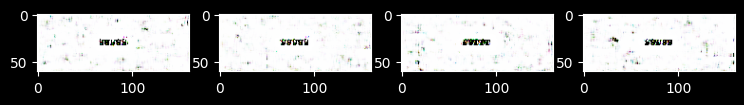

In [79]:
noise = np.random.normal(0, 1, (4, 100))  # Example input
generated_image = model.predict(noise)
# generated_image = 0.5 * generated_image + 0.5  # Rescale to [0, 1]

# # Display the generated image (example)
fig, axes = plt.subplots(1, 4, figsize=(9,8))
for index, ax in enumerate(axes):
    ax.imshow(generated_image[index])
plt.show()

In [73]:
noise[0].shape

(100,)

In [76]:
28*28

784